In [1]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import (get_local_packing_fraction, get_packing_mean_and_std_dev)

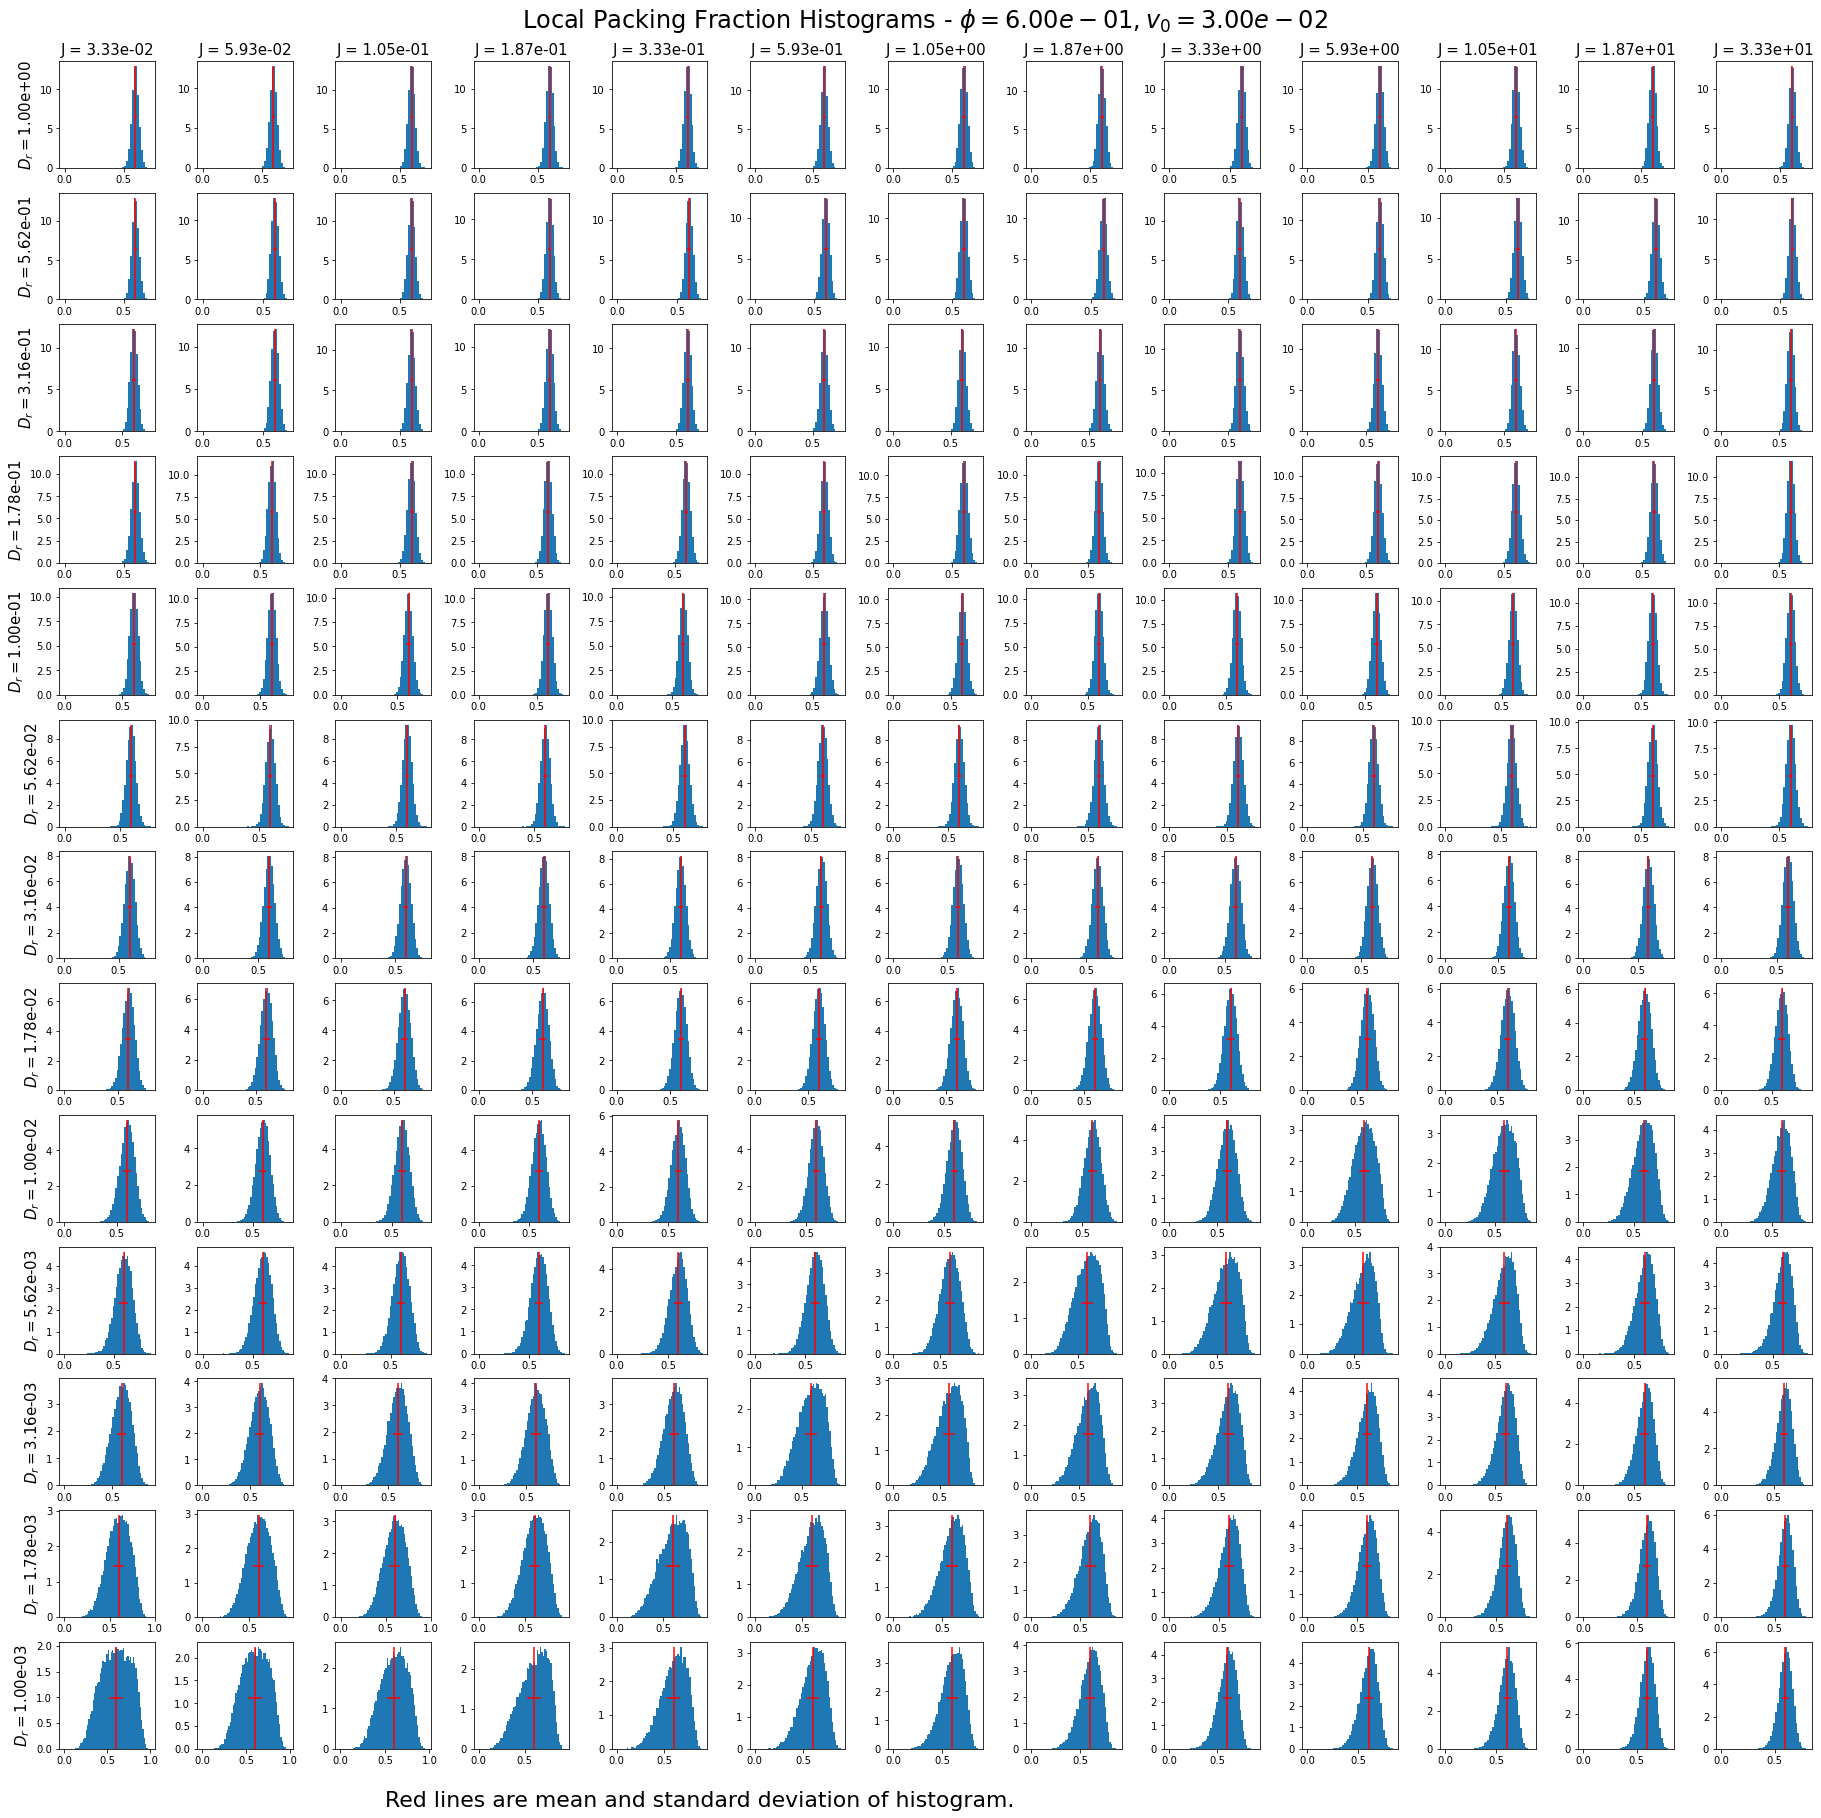

In [3]:
#Plot For Single Group of Simulations
save_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)

Jv_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)

fig, axs = plt.subplots(13,13, figsize = (25, 25))
fig.tight_layout(pad=0.5)
fig.suptitle(rf'Local Packing Fraction Histograms - $\phi={phi:.2e}, v_0={v0:.2e}$', fontsize = 24)

for J_index, Jv in enumerate(Jv_vals):
    for Dr_index, Dr in enumerate(Dr_vals):
        J = Jv/v0
        #Load data
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
        with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
            local_packing_fraction = np.load(local_packing_file)
        mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
        bin_edges = edges_from_centers_linear(bin_centers)
        y, _, _ = axs[-Dr_index-1, J_index].hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
        axs[-Dr_index-1, J_index].vlines(mean, ymin=0, ymax=y.max(), color='red')
        axs[-Dr_index-1, J_index].hlines(y=y.max()/2, xmin=mean-std_dev/2, xmax=mean+std_dev/2, colors='r')
        if J_index == 0:
            axs[-Dr_index-1, J_index].set_ylabel(r'$D_r = $' + f'{Dr:.2e}', fontsize = 15)
        if Dr_index == len(Dr_vals)-1:
            axs[-Dr_index-1, J_index].set_title(f"J = {J:.2e}", fontsize = 15)
plt.subplots_adjust(top=0.95)
plt.text(0.2, -0.02, r'Red lines are mean and standard deviation of histogram.', fontsize=22, transform=plt.gcf().transFigure)
pdf_filename = os.path.join(save_dir, exp_folder_name, 'phase_diagrams', "packing_fraction_histograms.pdf")
save_fig_pdf(pdf_filename)

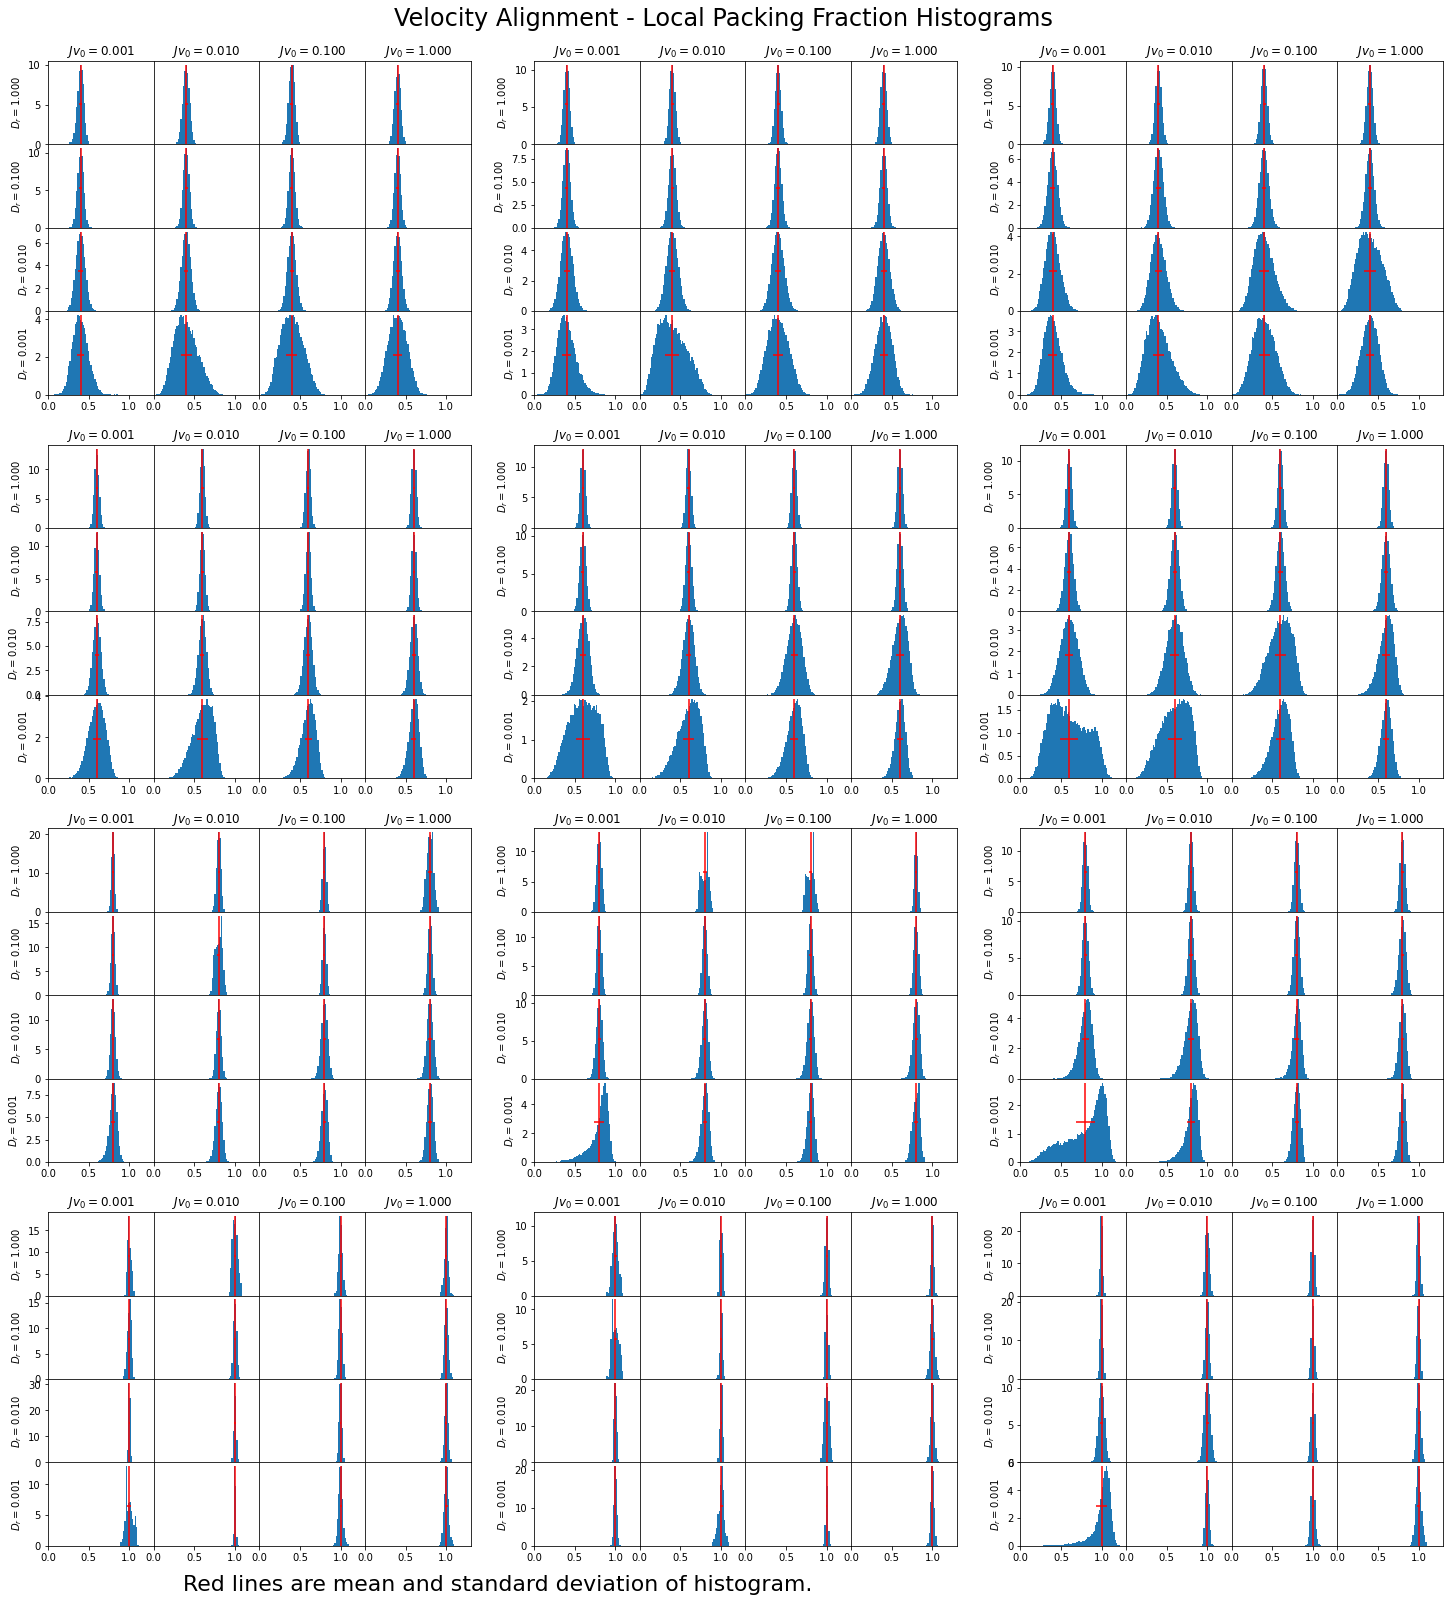

In [4]:
#Plot For Multiple Groups of Simulations
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"

phi_vals = [0.4, 0.6, 0.8, 1]
v0_vals = [0.01, 0.03, 0.1]
Jv_vals = np.logspace(-3, 0, num=4)
Dr_vals = np.logspace(-3, 0, num=4)

fig = plt.figure(figsize=(25, 25))
outer_grid = fig.add_gridspec(len(phi_vals), len(v0_vals), wspace=0.15, hspace=0.15)

for phi_index, phi in enumerate(phi_vals):
    for v0_index, v0 in enumerate(v0_vals):
        # gridspec inside gridspec
        inner_grid = outer_grid[phi_index, v0_index].subgridspec(len(Dr_vals), len(Jv_vals), wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for J_index, Jv in enumerate(Jv_vals):
            for Dr_index, Dr in enumerate(Dr_vals):
                J = Jv / v0
                exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
                run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
                analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
                with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
                    local_packing_fraction = np.load(local_packing_file)
                mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
                bin_edges = edges_from_centers_linear(bin_centers)
                y, _, _ = axs[-Dr_index-1, J_index].hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
                axs[-Dr_index-1, J_index].vlines(mean, ymin=0, ymax=y.max(), color='red')
                axs[-Dr_index-1, J_index].hlines(y=y.max()/2, xmin=mean-std_dev/2, xmax=mean+std_dev/2, colors='r')
                axs[-Dr_index-1, J_index].set_xlim(0, 1.3)
                if Dr_index != 0:
                    axs[-Dr_index-1, J_index].set(xticks=[])
                if J_index != 0:
                    axs[-Dr_index-1, J_index].set(yticks=[])
                if Dr_index == len(Dr_vals)-1:
                    axs[-Dr_index-1, J_index].set_title(rf'$Jv_0 = {Jv:.3f}$')
                if J_index == 0:
                    axs[-Dr_index-1, J_index].set_ylabel(rf'$D_r = {Dr:.3f}$')

fig.suptitle(rf'Velocity Alignment - Local Packing Fraction Histograms', fontsize = 24)
plt.subplots_adjust(top=0.95)
plt.text(0.2, 0.1, r'Red lines are mean and standard deviation of histogram.', fontsize=22, transform=plt.gcf().transFigure)
save_fig_pdf(os.path.join(save_dir, 'phase_diagrams', 'packing_fraction_histograms.pdf'))
plt.show()